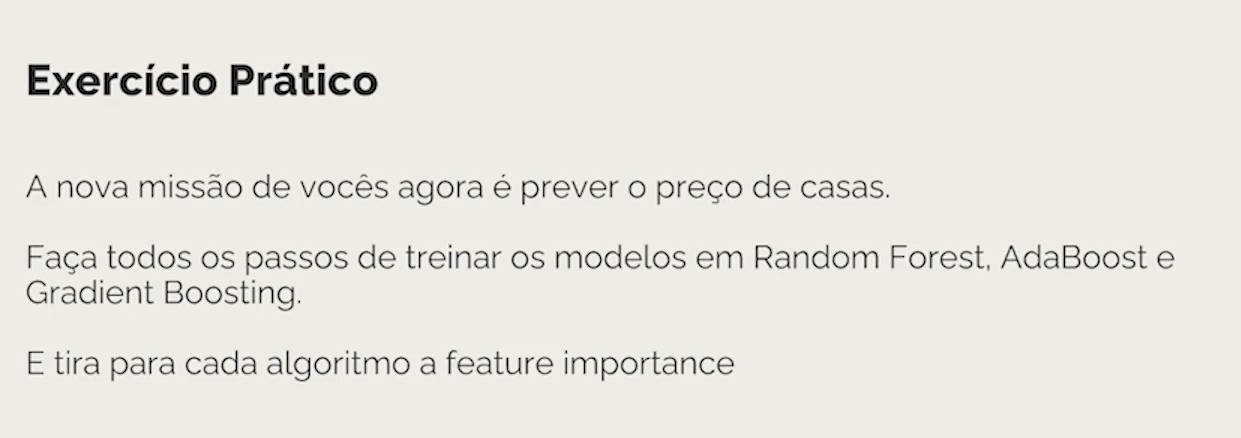

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import export_graphviz, DecisionTreeRegressor
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

import pydot

In [16]:
# Importando base
casa = pd.read_excel(r"house (1).xlsx")

### Análise Exploratória

In [17]:
casa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   ExterQual      1460 non-null   object 
 10  ExterCond      1460 non-null   object 
 11  BsmtFinSF1     1460 non-null   int64  
 12  BsmtFinSF2     1460 non-null   int64  
 13  BsmtUnfSF      1460 non-null   int64  
 14  TotalBsmtSF    1460 non-null   int64  
 15  1stFlrSF       1460 non-null   int64  
 16  2ndFlrSF       1460 non-null   int64  
 17  LowQualFinSF   1460 non-null   int64  
 18  GrLivAre

In [18]:
casa = casa.dropna()

In [19]:
casa.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,...,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000
mean,726.842105,56.146298,70.665477,10122.956289,6.212310,5.561106,1972.264942,1985.683318,108.487957,438.399643,...,92.610169,46.130241,21.844781,3.348796,16.100803,2.934880,23.429081,6.339875,2007.795718,185506.152542
std,420.769012,41.772684,24.266812,8129.302641,1.380822,1.068236,30.967730,21.025974,189.500966,468.385038,...,121.868623,64.390029,61.282083,29.772540,57.801829,40.222087,165.759816,2.687854,1.335043,82999.159004
min,1.000000,20.000000,21.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,364.000000,20.000000,60.000000,7590.000000,5.000000,5.000000,1953.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,131000.000000
50%,725.000000,50.000000,70.000000,9416.000000,6.000000,5.000000,1974.000000,1995.000000,0.000000,374.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,164900.000000
75%,1091.000000,70.000000,80.000000,11361.000000,7.000000,6.000000,2003.000000,2005.000000,170.000000,702.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,219500.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,648.000000,2500.000000,12.000000,2010.000000,755000.000000


In [20]:
casa = pd.get_dummies(casa)
casa

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,YrSold,SalePrice,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_TA
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,2008,208500,False,False,True,False,False,False,False,True
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,2007,181500,False,False,False,True,False,False,False,True
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,2008,223500,False,False,True,False,False,False,False,True
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,2006,140000,False,False,False,True,False,False,False,True
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,2008,250000,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,2007,175000,False,False,False,True,False,False,False,True
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,2010,210000,False,False,False,True,False,False,False,True
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,2010,266500,True,False,False,False,False,False,True,False
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,2010,142125,False,False,False,True,False,False,False,True


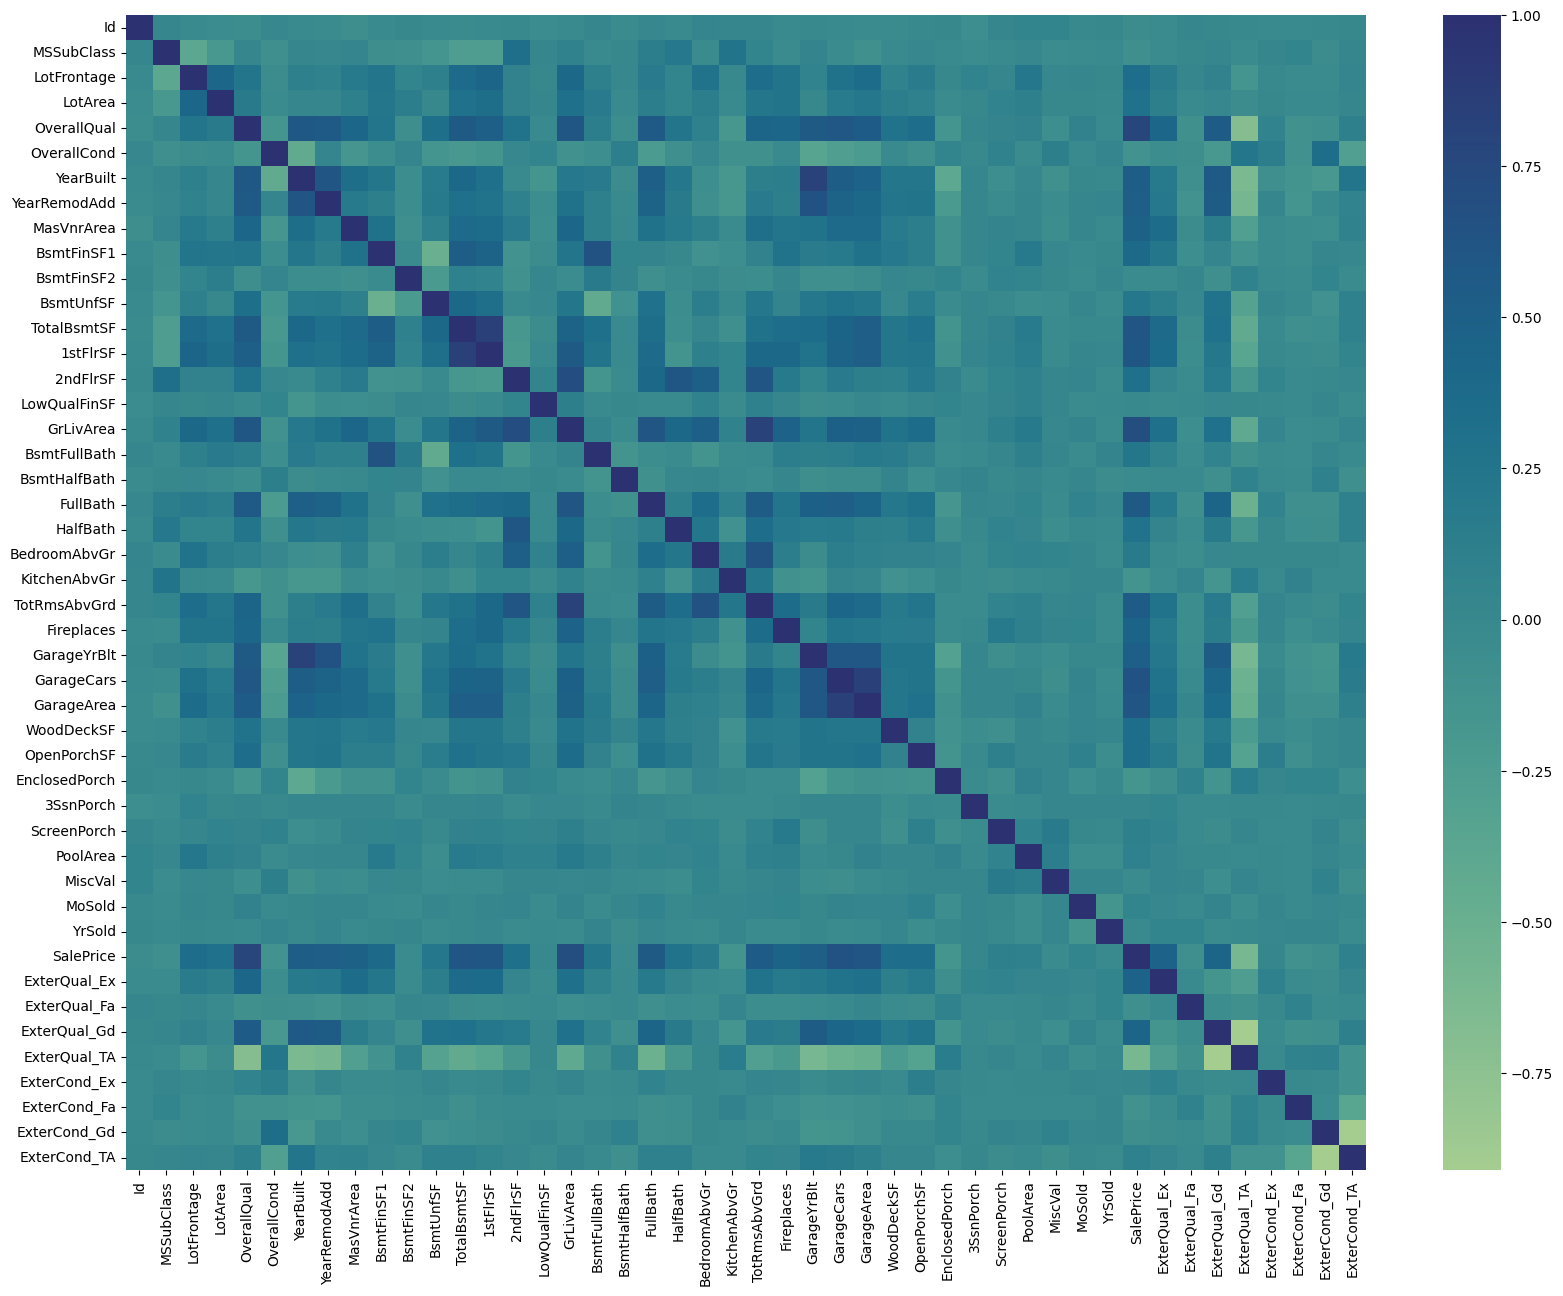

In [21]:
plt.figure(figsize=(20,15))
sns.heatmap(casa.corr(), cmap='crest');

# Separando base de dados

In [22]:
# Definindo a variável objetivo e explicativas
labels = np.array(casa['SalePrice'])

features= casa.drop('SalePrice', axis = 1)
# Salvando nome das colunas e transformando o dataframe em um numpy array
feature_list = list(casa.columns)
casa = np.array(features)

Separando base de dados

In [23]:
# Extraindo da base explicativa e target os dados de treino e teste
train_features, test_features, train_target, test_target = train_test_split(features, labels, test_size=0.25, random_state=42)

# Treinando modelo

### Ensameble
Treina vários modelos para decidir qual terá o melhor resultado

- Bagging: Treina uma série de modelo paralelamente, cada modelo treina uma amostra aleatória da base de dados
- Boosting: treina uma série de modelos sequencialmente, e treina o próximo modelo com os erros do anterior
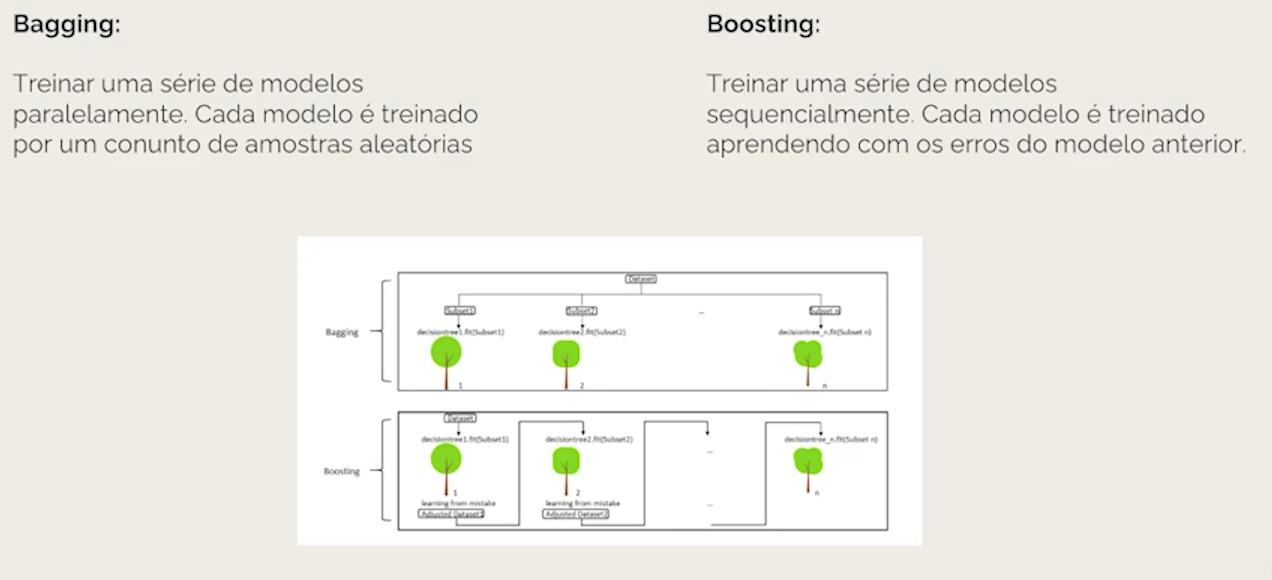


- Random Forest Regressor: Cria várias árvores e retorna a média dos resultados de cada árvore (Utiliza o Bagging)
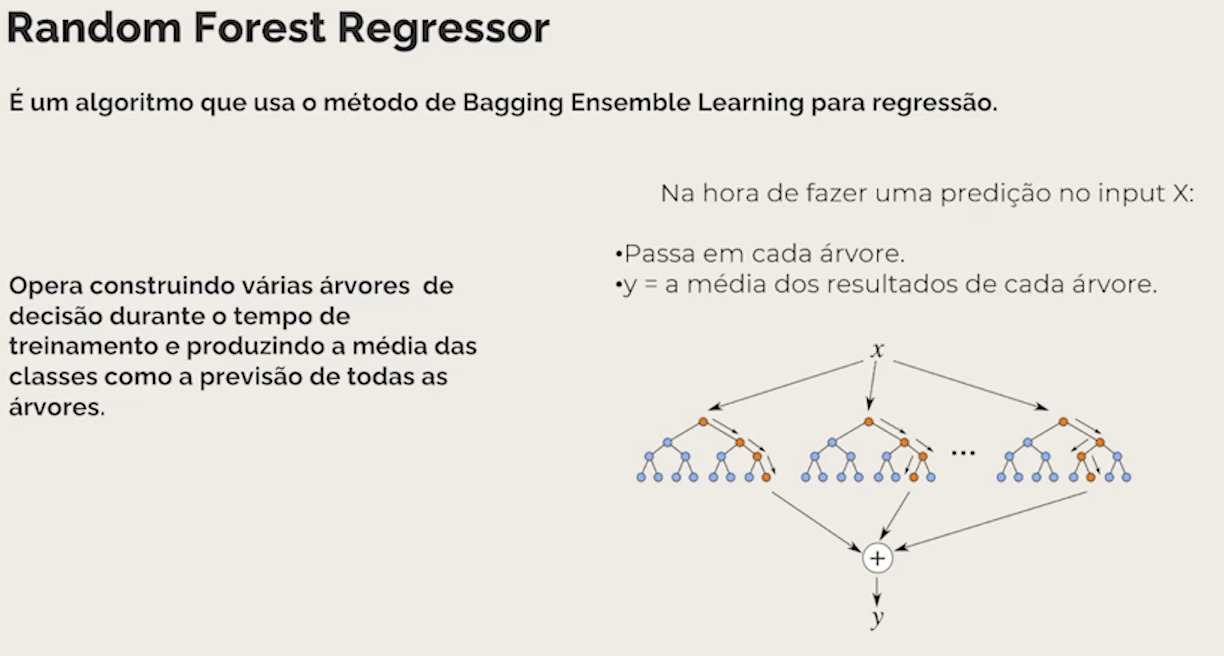


- AdaBoost: Aprende com os erros do modelo anterior (Utiliza bossting)
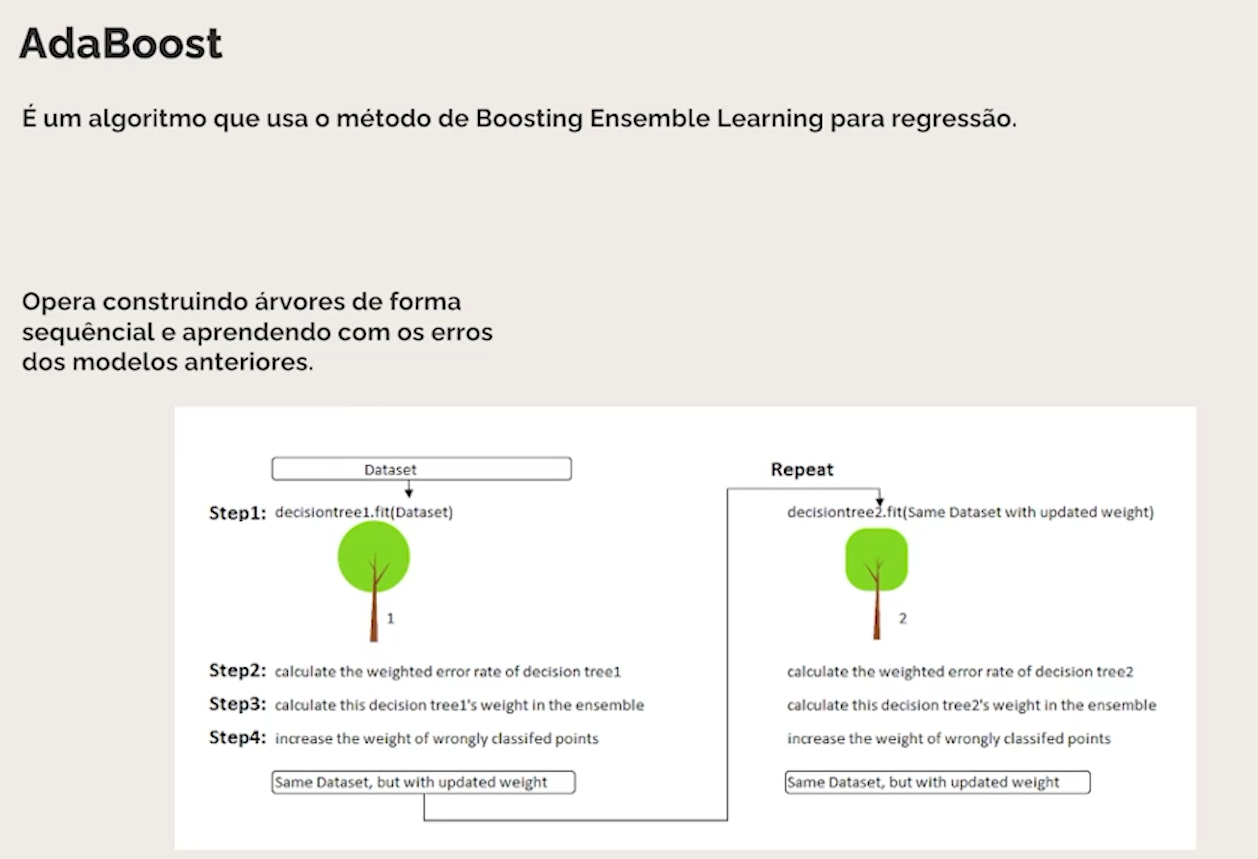


- Gradient Boosting: Tem a mesma base do AdaBoost, mas utiliza o resíduo (erro) do modelo para repassar para o próximo
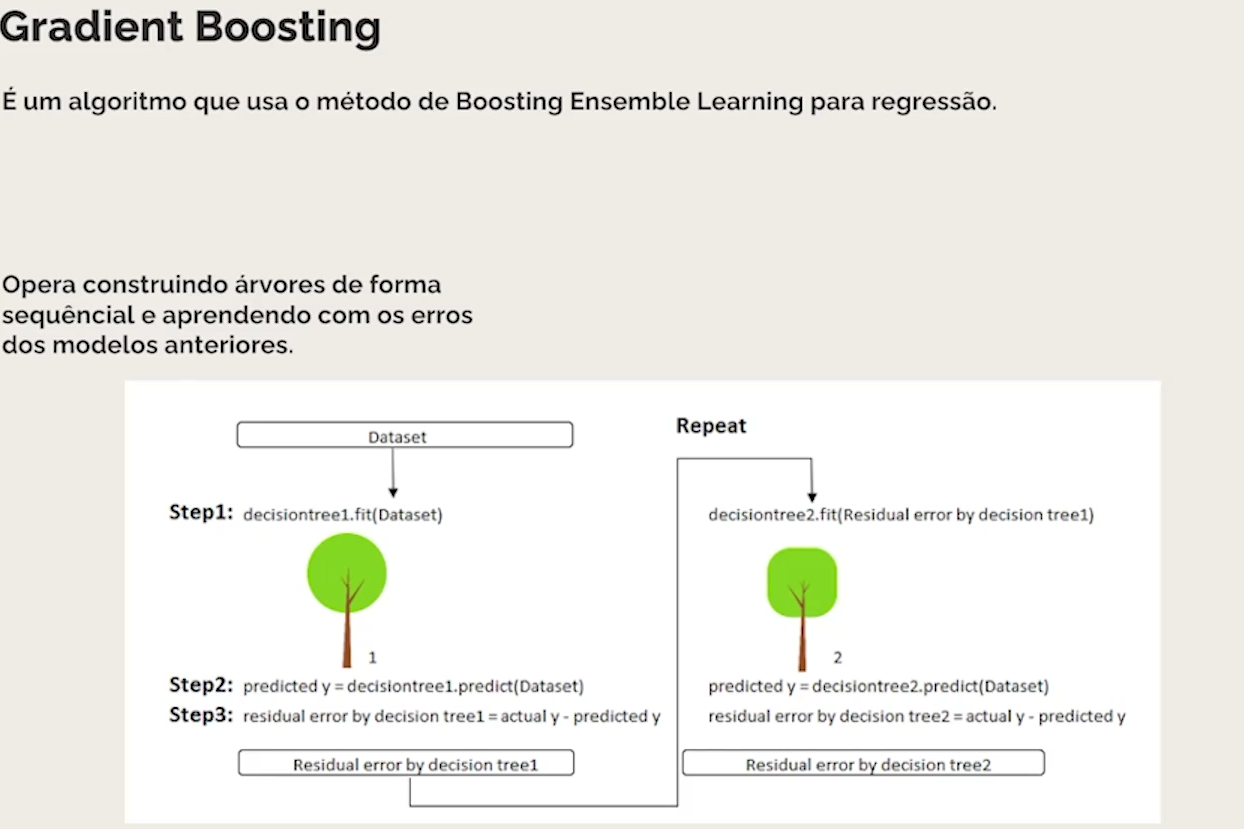


## Treino com RandomForestRegressor

In [24]:
# Construindo modelo
rf = RandomForestRegressor(n_estimators=1000, random_state=42)

# Treinando com a base de treino
rf.fit(train_features, train_target);

Construindo predicoes

In [25]:
# forecast do método
predictions_rf = rf.predict(test_features)

# Calcula o erro absoluto
error_rf = abs(predictions_rf - test_target)

In [30]:
# forecast do método
predictions_rf = rf.predict(test_features)

# Calcula o erro absoluto
error_rf = abs(predictions_rf - test_target)
r_sq = rf.score(features, labels)

# Printa as métricas de avaliação do modelo
print('Mean Absolute Error', round(np.mean(error_rf), 2), 'degrees') # Plota a média de erro absoluto em graus

print('MAE:', mean_absolute_error(test_target, predictions_rf))
print('MSE:', mean_squared_error(test_target, predictions_rf))
print('RMSE:', np.sqrt(mean_squared_error(test_target, predictions_rf)))

Mean Absolute Error 19122.89 degrees
MAE: 19122.88696441281
MSE: 937331048.1581936
RMSE: 30615.862688452755


# Treino com AdaBoostRegressor

In [31]:
# Construindo modelo com AdaBoost
ada = AdaBoostRegressor(n_estimators=1000)
ada.fit(train_features, train_target)
ada_pred = ada.predict(test_features)

In [32]:
# Calculate the absolute errors
errors_ada = abs(ada_pred - test_target)

# Print out the mean absolute error (mae)
r_sq = ada.score(features, labels)
print('Coeficiente de Determinação (R²):', r_sq)

print('MAE:', mean_absolute_error(test_target, ada_pred))
print('MSE:', mean_squared_error(test_target, ada_pred))
print('RMSE:', np.sqrt(mean_squared_error(test_target, ada_pred)))

Coeficiente de Determinação (R²): 0.867853128150901
MAE: 24840.895405751697
MSE: 1418713702.7883558
RMSE: 37665.81610410633


# Treino com GradientBoostingRegressor

In [33]:
grb = GradientBoostingRegressor(n_estimators=100)
grb.fit(train_features, train_target)
gbr_pred = grb.predict(test_features)

In [34]:
# Calcula o erro absoluto
errors_gbr = abs(gbr_pred - test_target)

# Erro absoluto (MAE)
r_sq = grb.score(features, labels)
print('Coeficiente de Determinação (R²):', r_sq)

print('MAE:', mean_absolute_error(test_target, gbr_pred))
print('MSE:', mean_squared_error(test_target, gbr_pred))
print('RMSE:', np.sqrt(mean_squared_error(test_target, gbr_pred)))

Coeficiente de Determinação (R²): 0.9519190550036459
MAE: 18256.2532608163
MSE: 767341995.79533
RMSE: 27700.938536362446
